In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [332]:
import numpy as np # make some array  
import pandas as pd # creating dataframe
from sklearn.model_selection import train_test_split # Spliting data into train and test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # for accuracy

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

**Data Load in the csv format**

In [317]:

Data= pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')
Data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


In [297]:
#First 5 data
Data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Data PreProcessing**





In [345]:
#Data preprocessing
print("How many rows and col: ", Data.shape) # How many row and colums in table

Data.info() # Information about which type of data is present in table
Data.isnull().sum() # checking individual columns for null values

How many rows and col:  (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

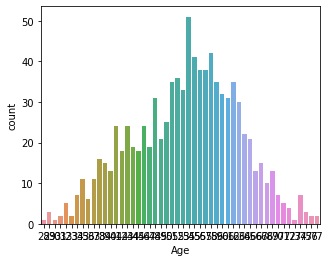

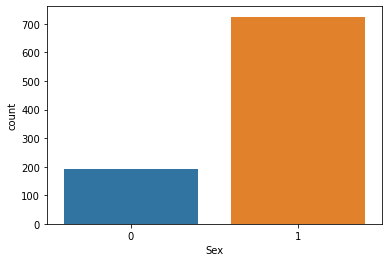

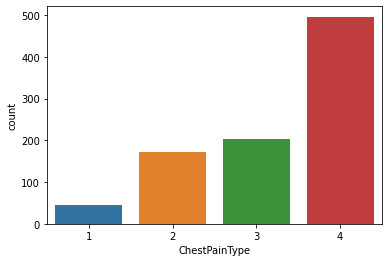

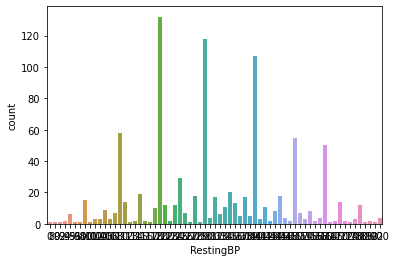

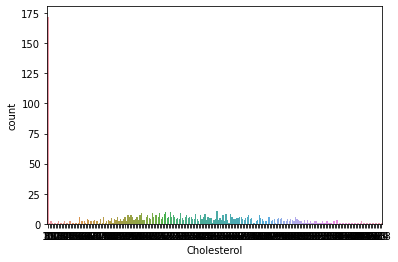

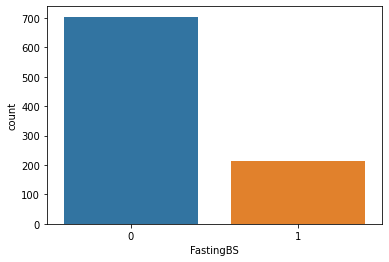

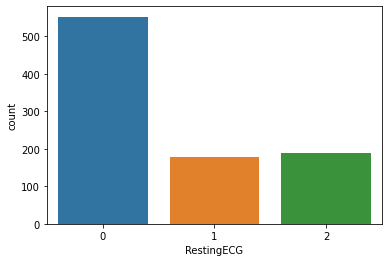

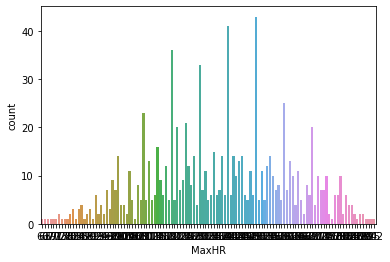

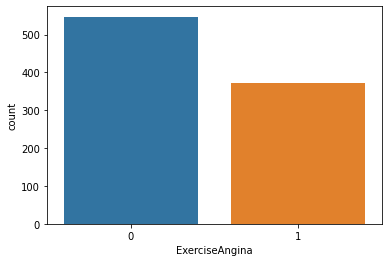

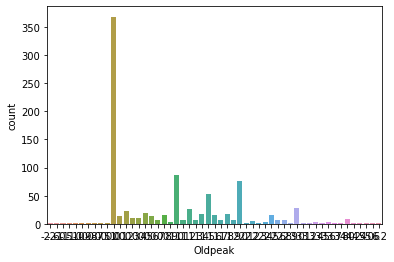

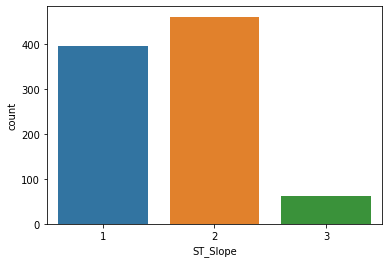

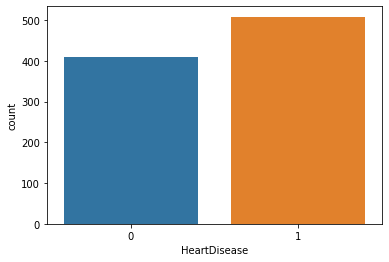

In [322]:
plt.figure(figsize = (5, 4))
for i in Data:
  plt.show(sns.countplot(Data[i]))

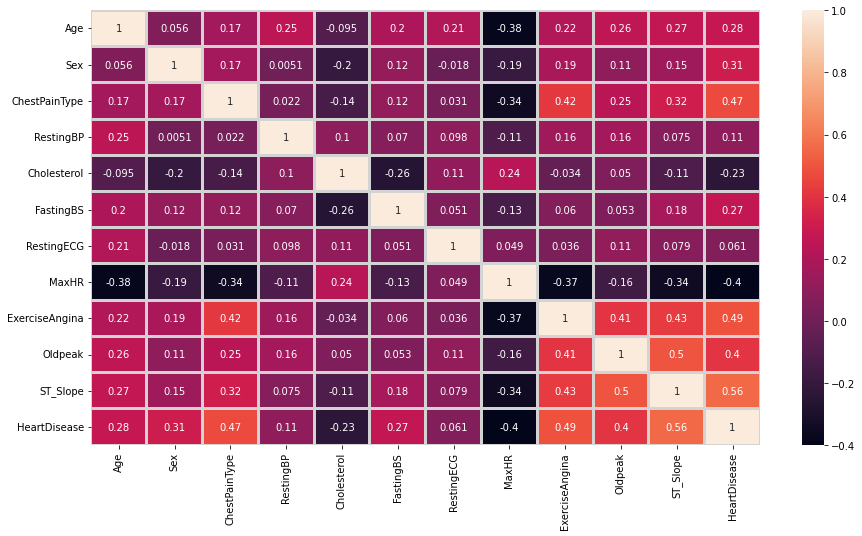

In [347]:
plt.figure(figsize = (15, 8))

sns.heatmap(Data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [303]:
Data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [304]:
X = Data.drop(columns='HeartDisease')
Y = Data['HeartDisease']

**Training model**

In [305]:
# train data and test data split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [348]:
model = LogisticRegression()
model1 = KNeighborsClassifier(n_neighbors=3)

In [308]:
X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100
print("Accuracy of train data :", traning_data_accuracy)

Accuracy of train data : 86.37602179836512


In [309]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)*100
print('Accuracy of test data :', test_data_accuracy)

Accuracy of test data : 82.6086956521739


**Save trained model**

In [327]:
# model.fit(X_train, Y_train)
# filename = 'modellog'
# joblib.dump(model,filename)


['modellog']

In [349]:
model1.fit(X_train, Y_train)
filename1 = 'modelKN'
joblib.dump(model1,filename1)

['modelKN']

**Load trained model**

In [350]:
modellogic = joblib.load('/content/drive/MyDrive/Dataset/modellog')
modelKn = joblib.load('/content/drive/MyDrive/Dataset/modelKN')

In [330]:
X_train_prediction = modellogic.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100
print("Accuracy of train data :", traning_data_accuracy)

Accuracy of train data : 86.37602179836512


In [351]:
X_train_prediction = modelKn.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100
print("Accuracy of train data :", traning_data_accuracy)

Accuracy of train data : 82.42506811989101


In [344]:
# Prediction test
input = [49,0,2,124,201,0,0,164,0,0,1]

data_prediction = np.array(input)
data_reshape = data_prediction.reshape(1,-1)

prediction = modelKn.predict(data_reshape)
if prediction == 1:
  print("You are suffering from heart disease")
else:
  print("You are not suffering from heart disease")


You are not suffering from heart disease
